#### Knock Airport Weather

Data link for Knock Airport Weather CSV. https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

In [260]:
# Python libraries
import pandas as pd
import datetime
import numpy as np
import seaborn as sns

In [316]:
# Load data
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, low_memory=False)
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


Change the 'date' column to 'datetime' type.

In [317]:
pd.to_datetime(df['date']).dt.strftime('%Y-%m-%dT%H:%M:%S')

df['date'] = pd.to_datetime(df['date'])

df['date']

C:\Users\phumi\AppData\Local\Temp\ipykernel_14912\657735353.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['date']).dt.strftime('%Y-%m-%dT%H:%M:%S')
C:\Users\phumi\AppData\Local\Temp\ipykernel_14912\657735353.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
247669   2024-10-31 20:00:00
247670   2024-10-31 21:00:00
247671   2024-10-31 22:00:00
247672   2024-10-31 23:00:00
247673   2024-11-01 00:00:00
Name: date, Length: 247674, dtype: datetime64[ns]

Set 'date' column as index

In [318]:
df.set_index('date', inplace=True)
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7


#### Plotting

<Axes: xlabel='date', ylabel='temp'>

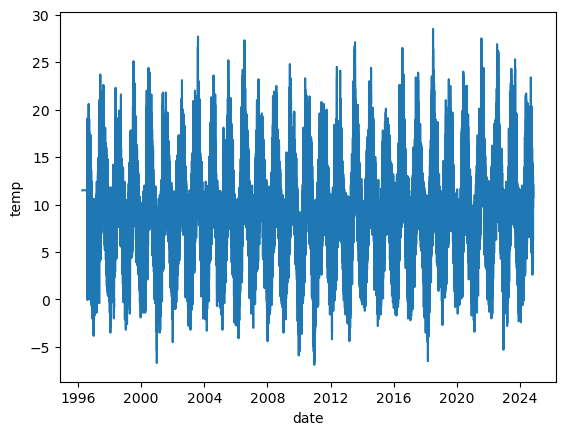

In [319]:
# Temperature over the years
sns.lineplot(data=df, x='date', y='temp')


Mean Temperature

In [320]:
# Calculate the mean temp

dateFrom = "1996-04-10 14:00:00"
dateTo = "2024-11-01 00:00:00"
df.loc[dateFrom:dateTo]['temp'].mean()

8.766820094156028

Calculate Daily Mean Temperature

In [ ]:
# Daily mean temperature
daily_av =  df["temp"].resample("D").mean()

# Create 'daily_av' column
df['daily_av'] = df["temp"].resample("D").mean()


In [ ]:
# missing data
print(df['daily_av'].isnull())

date
1996-04-10 14:00:00     True
1996-07-31 08:00:00     True
1996-07-31 09:00:00     True
1996-07-31 10:00:00     True
1996-07-31 11:00:00     True
                       ...  
2024-10-31 20:00:00     True
2024-10-31 21:00:00     True
2024-10-31 22:00:00     True
2024-10-31 23:00:00     True
2024-11-01 00:00:00    False
Name: daily_av, Length: 247674, dtype: bool


In [ ]:
# Dropping null values.

df.dropna(inplace = True)
df.head(3)


,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,daily_av
date,,,,,,,,,,,,,,,,,,,,,
1996-08-01,0,0.0,0,9.7,0,9.0,8.3,0.0,0,1011.4,...,0,0,0,1,81,0.0,35000,999,3,11.666667
1996-08-02,0,0.0,0,10.3,0,9.6,8.9,11.4,91,1020.7,...,4,2,260,1,82,0.0,35000,30,6,12.504167
1996-08-03,0,0.0,0,12.1,0,11.7,11.3,13.4,95,1028.6,...,5,2,230,2,11,4.9,40000,39,7,14.266667


<Axes: xlabel='date', ylabel='daily_av'>

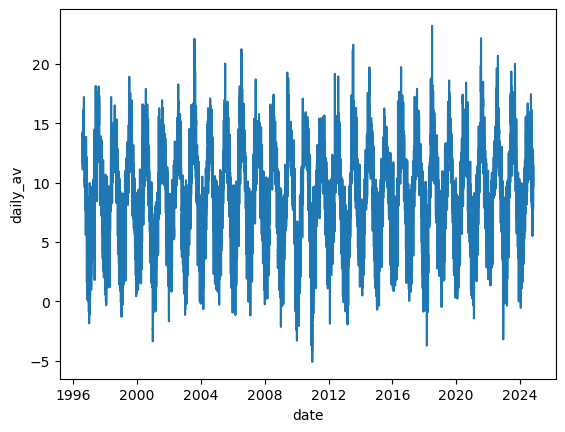

In [324]:
# Plot
sns.lineplot(data=df, x='date', y='daily_av')


Calculate Monthly Mean Temperature

In [ ]:
# Monthly mean temperature
monthly_av = df["temp"].resample("ME").mean()

#Create 'monthly_av' column
df['monthly_av'] = df["temp"].resample("ME").mean()


In [ ]:
# missing data
print(df['monthly_av'].isnull())

date
1996-08-01     True
1996-08-02     True
1996-08-03     True
1996-08-04     True
1996-08-05     True
              ...  
2024-10-28     True
2024-10-29     True
2024-10-30     True
2024-10-31    False
2024-11-01     True
Name: monthly_av, Length: 10320, dtype: bool


In [328]:
# Dropping null values.
df.dropna(inplace = True)

df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,ind.4,wddir,ww,w,sun,vis,clht,clamt,daily_av,monthly_av
date,,,,,,,,,,,,,,,,,,,,,
1996-08-31,0,0.0,0,8.2,0,7.9,7.6,10.4,96,1030.5,...,2,270,2,11,4.9,50000,999,1,11.258333,11.274194
1996-09-30,0,0.0,0,8.2,0,7.6,6.9,10.0,92,1007.9,...,2,240,2,81,0.0,40000,50,5,8.795833,10.560000
1996-10-31,0,1.9,0,9.0,0,9.0,9.0,11.5,100,1007.9,...,2,160,61,62,0.0,2400,2,8,10.050000,8.661290


<Axes: xlabel='date', ylabel='monthly_av'>

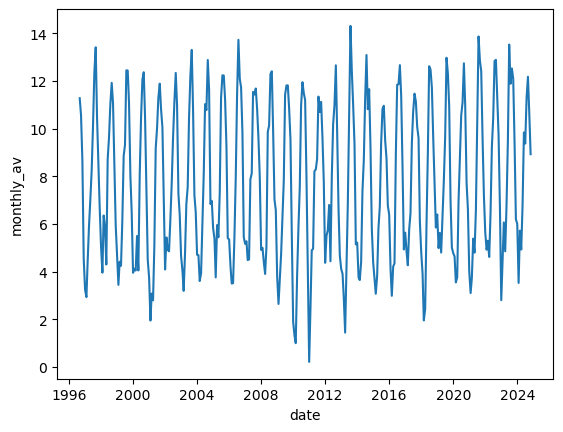

In [281]:
# Plot
sns.lineplot(data=df, x='date', y='monthly_av')

#### The Windspeed

In [329]:
# Convert windspeed to floats
df['wdsp'] = df['wdsp'].astype(float) 

Calculate average windspeed

In [331]:
# Yearly average
y_ave =  df['wdsp'].resample('YE').mean()

# Create 'y_ave' column
df['y_ave'] = df['wdsp'].resample('YE').mean()


In [333]:
#missing data

print(df['y_ave'].isnull())

date
1996-08-31     True
1996-09-30     True
1996-10-31     True
1996-11-30     True
1996-12-31    False
              ...  
2024-06-30     True
2024-07-31     True
2024-08-31     True
2024-09-30     True
2024-10-31     True
Name: y_ave, Length: 339, dtype: bool


In [347]:
# Dropping null values.

df.dropna(inplace = True)
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,w,sun,vis,clht,clamt,daily_av,monthly_av,y_ave,daily_maxspeed,monthly_av_maxspeed
date,,,,,,,,,,,,,,,,,,,,,
1996-12-31,0,0.0,1,-0.2,1,-1.4,-4.0,4.6,76,1024.3,...,11,4.9,40000,50,5,-1.504167,3.245161,13.200000,9.0,9.0
1997-12-31,0,0.2,0,4.1,0,3.5,2.6,7.4,90,986.0,...,62,0.0,25000,28,8,1.320833,5.032258,8.083333,13.0,13.0
1998-12-31,0,0.0,0,4.0,0,3.1,1.7,6.9,85,986.2,...,11,0.0,30000,35,6,3.945833,4.729032,9.500000,21.0,21.0


<Axes: xlabel='date', ylabel='y_ave'>

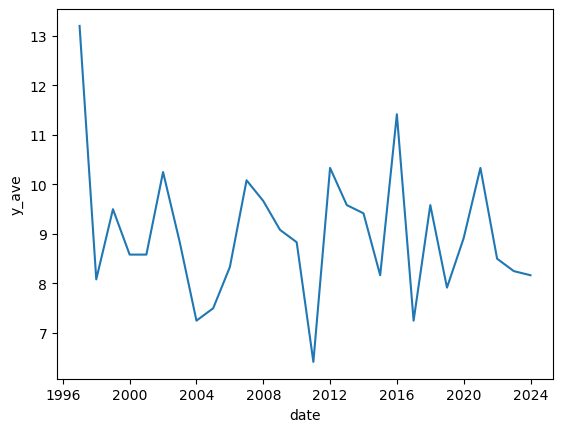

In [ ]:
# Plot
sns.lineplot(data=df, x='date', y='y_ave')

Daily Maximum windspeed.

In [337]:
# Maximum daily windspeed
daily_maxspeed =  df['wdsp'].resample('D').max()

# Create 'daily_max' column
df['daily_maxspeed'] = df["wdsp"].resample("D").max()


<Axes: xlabel='date', ylabel='daily_maxspeed'>

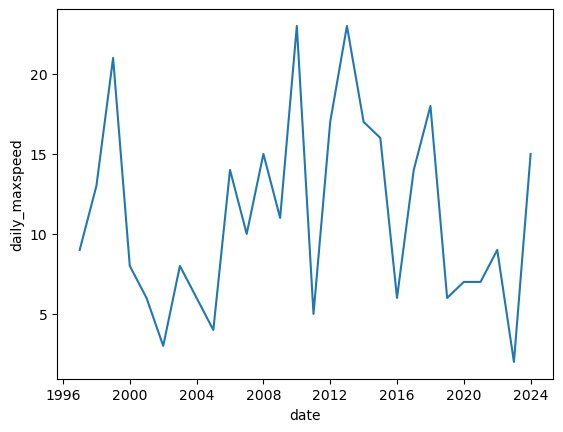

In [ ]:
# Plot
sns.lineplot(data=df, x='date', y='daily_maxspeed')

Monthly Mean for daily maximum windspeed.

In [ ]:
# Monthly mean of daily maximun speed
monthly_av_maxspeed = df['daily_maxspeed'].resample('ME').mean()

#Create 'monthly_maxspeed' column
df['monthly_av_maxspeed'] = df["daily_maxspeed"].resample("ME").mean()


<Axes: xlabel='date', ylabel='monthly_av_maxspeed'>

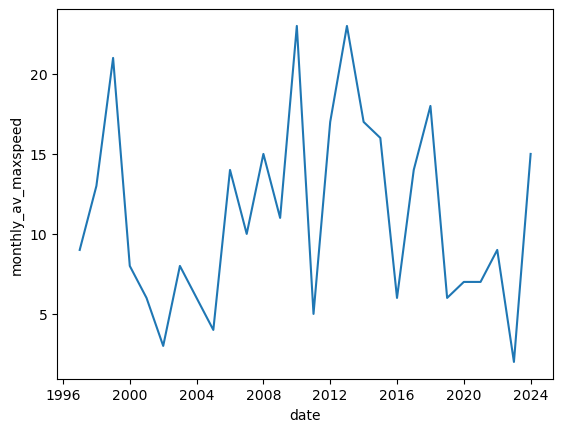

In [ ]:
#Plot
sns.lineplot(data=df, x='date', y='monthly_av_maxspeed')